<a href="https://colab.research.google.com/github/macotoyusa/memo/blob/main/shelling__ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [4]:
class Agent:

  def __init__(self, race, edu, kind):
    self.race = race
    self.state = "happy"
    self.edu = edu   #教育意識
    self.draw_location()  #場所
    self.kind = kind #動き方
  
  def draw_location(self):
    self.location = uniform(0,1), uniform(0,1)
  
  def get_distance(self, other):
    a = (self.location[0] - other.location[0])**2
    b = (self.location[1] - other.location[1])**2
    distance = sqrt(a + b)
    return distance

  def happy(self, agents):
    if self.kind == 0:  #kind == 0は人種
      distances = []
      for agent in agents:
        if self != agent:
          distance = self.get_distance(agent)
          distances.append((distance, agent))
      distances.sort()
      neighbors = [agent for distance, agent in distances[:num_neighbors]]
      num_same_race = sum(self.race == agent.race for agent in neighbors)
      if num_same_race >= require_same_race:
        self.state = "happy"
      else:
        self.state = "unhappy"
    elif self.kind == 1:
      distances = []
      for agent in agents:
        if self != agent:
          distance = self.get_distance(agent)
          distances.append((distance, agent))
      distances.sort()
      neighbors = [agent for distance, agent in distances[:num_neighbors]]
      num_same_edu = sum(self.edu == agent.edu for agent in neighbors)
      if self.edu == 0:
        self.state = "happy"
      elif self.edu == 1:
        if num_same_edu >= require_same_edu:
          self.state = "happy"
        else:
          self.state = "unhappy"

  def update(self):
    if self.state == "unhappy":
      self.draw_location()

In [19]:
###エージェントの数(人種_教育意識_動き方)
###エージェントの総数
n = 1000

###1000人中800人は人種で動く
num_of_race_i_i_0 = int(n * (4/5) * (1/4))

###1000人中200人は教育意識で動く
num_of_race_i_i_1 = int(n * (1/5) * (1/4))

num_neighbors = 10 ###隣人と判断されるエージェント（個人）の数

require_same_edu = 3 ###少なくともこの数と同じ教育意識のエージェントが隣人であってほしい


###リストの作成
agents = [Agent(0,0,0) for i in range(num_of_race_i_i_0)]
agents.extend(Agent(0,1,0) for i in range(num_of_race_i_i_0))
agents.extend(Agent(1,0,0) for i in range(num_of_race_i_i_0))
agents.extend(Agent(1,1,0) for i in range(num_of_race_i_i_0))

agents.extend(Agent(0,0,1) for i in range(num_of_race_i_i_1))
agents.extend(Agent(0,1,1) for i in range(num_of_race_i_i_1))
agents.extend(Agent(1,0,1) for i in range(num_of_race_i_i_1))
agents.extend(Agent(1,1,1) for i in range(num_of_race_i_i_1))

for agent in agents:    
  if agent.edu == 0:            ###edu == 0は教育意識が低いことを意味する
    require_same_race = 3       ###少なくともこの数の同じ人種のエージェントが隣人であってほしい
  elif agent.edu == 1:          ###edu == 1は教育意識が高いことを意味する
    require_same_race = 1

###動きたいエージェントがいなくなるまでループ
frame = []
while True:
  print("Entering loop ")
    ###プリントの準備
  x_value_0_0, y_value_0_0 = [], []
  x_value_0_1, y_value_0_1 = [], []
  x_value_1_0, y_value_1_0 = [], []
  x_value_1_1, y_value_1_1 = [], []
  for agent in agents:
    x, y = agent.location
    if agent.race == 0:
      if agent.edu == 0:
        x_value_0_0.append(x)
        y_value_0_0.append(y)
      else:
        x_value_0_1.append(x)
        y_value_0_1.append(y)
    else:
      if agent.edu == 0:
        x_value_1_0.append(x)
        y_value_1_0.append(y)
      else:
        x_value_1_1.append(x)
        y_value_1_1.append(y)
  frame.append([[x_value_0_0, y_value_0_0], 
                [x_value_0_1, y_value_0_1], 
                [x_value_1_0, y_value_1_0], 
                [x_value_1_1, y_value_1_1]])
 
  no_one_moved = True
  for agent in agents:
    old_location = agent.location
    agent.happy(agents)
    agent.update()
    if agent.location != old_location:
      no_one_moved = False
  if no_one_moved:
    break

print("Converged, terminating.")

Entering loop 
Entering loop 
Entering loop 
Converged, terminating.


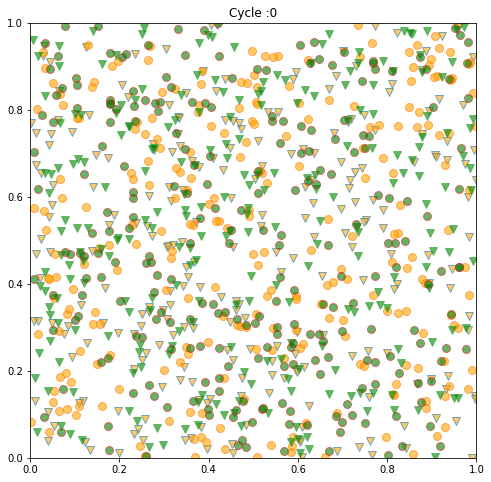

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_args = {'markersize' : 8, 'alpha' : 0.6}
im1, = ax.plot([], [], 'v', markerfacecolor='orange',  **plot_args)
im2, = ax.plot([], [], 'o', markerfacecolor='orange',  **plot_args)
im3, = ax.plot([], [], 'v', markerfacecolor='green',  **plot_args)
im4, = ax.plot([], [], 'o', markerfacecolor='green',  **plot_args)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

def update(i):
    im1.set_data(frame[i][0]) #教育意識の低い人種0
    im2.set_data(frame[i][1]) #教育意識の高い人種0
    im3.set_data(frame[i][2]) #教育意識の低い人種1
    im4.set_data(frame[i][3]) #教育意識の高い人種1
    plt.title('Cycle :{}'.format(i))
anim = FuncAnimation(fig, update,  blit=False,interval = 1000,frames=len(frame))
HTML(anim.to_jshtml())

In [35]:
#人種aの開始時点での各区域における人数をカウント

frame_base = frame[0]

frame_base_1_a = []
frame_base_2_a = []
frame_base_3_a = []
frame_base_4_a = []
frame_base_5_a = []
frame_base_6_a = []
frame_base_7_a = []
frame_base_8_a = []
frame_base_9_a = []

x_value_base_1_a, y_value_base_1_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
     x_value_base_1_a.append(float(frame[0][0][0][i]))
     y_value_base_1_a.append(float(frame[0][0][1][i]))
  elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
     x_value_base_1_a.append(float(frame[0][1][0][i]))
     y_value_base_1_a.append(float(frame[0][1][1][i]))
frame_base_1_a.append([x_value_base_1_a, y_value_base_1_a])

x_value_base_2_a, y_value_base_2_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
     x_value_base_2_a.append(float(frame[0][0][0][i]))
     y_value_base_2_a.append(float(frame[0][0][1][i]))
  elif float(1/3) <= float(frame[0][1][0][i]) <= float(2/3) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
     x_value_base_2_a.append(float(frame[0][1][0][i]))
     y_value_base_2_a.append(float(frame[0][1][1][i]))
frame_base_2_a.append([x_value_base_2_a, y_value_base_2_a])

x_value_base_3_a, y_value_base_3_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
     x_value_base_3_a.append(float(frame[0][0][0][i]))
     y_value_base_3_a.append(float(frame[0][0][1][i]))
  elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
     x_value_base_3_a.append(float(frame[0][1][0][i]))
     y_value_base_3_a.append(float(frame[0][1][1][i]))
frame_base_3_a.append([x_value_base_3_a, y_value_base_3_a])

x_value_base_4_a, y_value_base_4_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
     x_value_base_4_a.append(float(frame[0][0][0][i]))
     y_value_base_4_a.append(float(frame[0][0][1][i]))
  elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
     x_value_base_4_a.append(float(frame[0][1][0][i]))
     y_value_base_4_a.append(float(frame[0][1][1][i]))
frame_base_4_a.append([x_value_base_4_a, y_value_base_4_a])

x_value_base_5_a, y_value_base_5_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
     x_value_base_5_a.append(float(frame[0][0][0][i]))
     y_value_base_5_a.append(float(frame[0][0][1][i]))
  elif float(1/3) < float(frame[0][1][0][i]) <= float(2/3) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
     x_value_base_5_a.append(float(frame[0][1][0][i]))
     y_value_base_5_a.append(float(frame[0][1][1][i]))
frame_base_5_a.append([x_value_base_5_a, y_value_base_5_a])

x_value_base_6_a, y_value_base_6_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
     x_value_base_6_a.append(float(frame[0][0][0][i]))
     y_value_base_6_a.append(float(frame[0][0][1][i]))
  elif float(2/3) < float(frame[0][1][0][i]) <= float(1) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
     x_value_base_6_a.append(float(frame[0][1][0][i]))
     y_value_base_6_a.append(float(frame[0][1][1][i]))
frame_base_6_a.append([x_value_base_6_a, y_value_base_6_a])

x_value_base_7_a, y_value_base_7_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(0) <= float(frame[0][0][1][i]) <= float(1/3):
     x_value_base_7_a.append(float(frame[0][0][0][i]))
     y_value_base_7_a.append(float(frame[0][0][1][i]))
  elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
     x_value_base_7_a.append(float(frame[0][1][0][i]))
     y_value_base_7_a.append(float(frame[0][1][1][i]))
frame_base_7_a.append([x_value_base_7_a, y_value_base_7_a])

x_value_base_8_a, y_value_base_8_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(0) < float(frame[0][0][1][i]) <= float(1/3):
     x_value_base_8_a.append(float(frame[0][0][0][i]))
     y_value_base_8_a.append(float(frame[0][0][1][i]))
  elif float(1/3) < float(frame[0][1][0][i]) <= float(2/3) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
     x_value_base_8_a.append(float(frame[0][1][0][i]))
     y_value_base_8_a.append(float(frame[0][1][1][i]))
frame_base_8_a.append([x_value_base_8_a, y_value_base_8_a])

x_value_base_9_a, y_value_base_9_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(0) < float(frame[0][0][1][i]) <= float(1/3):
     x_value_base_9_a.append(float(frame[0][0][0][i]))
     y_value_base_9_a.append(float(frame[0][0][1][i]))
  elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
     x_value_base_9_a.append(float(frame[0][1][0][i]))
     y_value_base_9_a.append(float(frame[0][1][1][i]))
frame_base_9_a.append([x_value_base_9_a, y_value_base_9_a])

In [36]:
#人種bの開始時点での各区域の人数をカウント

frame_base_1_b = []
frame_base_2_b = []
frame_base_3_b = []
frame_base_4_b = []
frame_base_5_b = []
frame_base_6_b = []
frame_base_7_b = []
frame_base_8_b = []
frame_base_9_b = []

x_value_base_1_b, y_value_base_1_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
     x_value_base_1_b.append(float(frame[0][2][0][i]))
     y_value_base_1_b.append(float(frame[0][2][1][i]))
  elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(2/3) < float(frame[0][3][1][i]) <= float(1):
     x_value_base_1_b.append(float(frame[0][3][0][i]))
     y_value_base_1_b.append(float(frame[0][3][1][i]))
frame_base_1_b.append([x_value_base_1_b, y_value_base_1_b])

x_value_base_2_b, y_value_base_2_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
     x_value_base_2_b.append(float(frame[0][2][0][i]))
     y_value_base_2_b.append(float(frame[0][2][1][i]))
  elif float(1/3) <= float(frame[0][3][0][i]) <= float(2/3) and float(2/3) < float(frame[0][3][1][i]) <= float(1):
     x_value_base_2_b.append(float(frame[0][3][0][i]))
     y_value_base_2_b.append(float(frame[0][3][1][i]))
frame_base_2_b.append([x_value_base_2_b, y_value_base_2_b])

x_value_base_3_b, y_value_base_3_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
     x_value_base_3_b.append(float(frame[0][2][0][i]))
     y_value_base_3_b.append(float(frame[0][2][1][i]))
  elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
     x_value_base_3_b.append(float(frame[0][3][0][i]))
     y_value_base_3_b.append(float(frame[0][3][1][i]))
frame_base_3_b.append([x_value_base_3_b, y_value_base_3_b])

x_value_base_4_b, y_value_base_4_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
     x_value_base_4_b.append(float(frame[0][2][0][i]))
     y_value_base_4_b.append(float(frame[0][2][1][i]))
  elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
     x_value_base_4_b.append(float(frame[0][3][0][i]))
     y_value_base_4_b.append(float(frame[0][3][1][i]))
frame_base_4_b.append([x_value_base_4_b, y_value_base_4_b])

x_value_base_5_b, y_value_base_5_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
     x_value_base_5_b.append(float(frame[0][2][0][i]))
     y_value_base_5_b.append(float(frame[0][2][1][i]))
  elif float(1/3) < float(frame[0][3][0][i]) <= float(2/3) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
     x_value_base_5_b.append(float(frame[0][3][0][i]))
     y_value_base_5_b.append(float(frame[0][3][1][i]))
frame_base_5_b.append([x_value_base_5_b, y_value_base_5_b])

x_value_base_6_b, y_value_base_6_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
     x_value_base_6_b.append(float(frame[0][2][0][i]))
     y_value_base_6_b.append(float(frame[0][2][1][i]))
  elif float(2/3) < float(frame[0][3][0][i]) <= float(1) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
     x_value_base_6_b.append(float(frame[0][3][0][i]))
     y_value_base_6_b.append(float(frame[0][3][1][i]))
frame_base_6_b.append([x_value_base_6_b, y_value_base_6_b])

x_value_base_7_b, y_value_base_7_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(0) <= float(frame[0][2][1][i]) <= float(1/3):
     x_value_base_7_b.append(float(frame[0][2][0][i]))
     y_value_base_7_b.append(float(frame[0][2][1][i]))
  elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
     x_value_base_7_b.append(float(frame[0][3][0][i]))
     y_value_base_7_b.append(float(frame[0][3][1][i]))
frame_base_7_b.append([x_value_base_7_b, y_value_base_7_b])

x_value_base_8_b, y_value_base_8_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(0) < float(frame[0][2][1][i]) <= float(1/3):
     x_value_base_8_b.append(float(frame[0][2][0][i]))
     y_value_base_8_b.append(float(frame[0][2][1][i]))
  elif float(1/3) < float(frame[0][3][0][i]) <= float(2/3) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
     x_value_base_8_b.append(float(frame[0][3][0][i]))
     y_value_base_8_b.append(float(frame[0][3][1][i]))
frame_base_8_b.append([x_value_base_8_b, y_value_base_8_b])

x_value_base_9_b, y_value_base_9_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(0) < float(frame[0][2][1][i]) <= float(1/3):
     x_value_base_9_b.append(float(frame[0][2][0][i]))
     y_value_base_9_b.append(float(frame[0][2][1][i]))
  elif float(2/3) <= float(frame[0][3][0][i]) <= float(1) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
     x_value_base_9_b.append(float(frame[0][3][0][i]))
     y_value_base_9_b.append(float(frame[0][3][1][i]))
frame_base_9_b.append([x_value_base_9_b, y_value_base_9_b])

In [38]:
#人種aの終了時点での各区域の人数をカウント

frame_latest = frame[-1]

frame_latest_1_a = []
frame_latest_2_a = []
frame_latest_3_a = []
frame_latest_4_a = []
frame_latest_5_a = []
frame_latest_6_a = []
frame_latest_7_a = []
frame_latest_8_a = []
frame_latest_9_a = []

x_value_latest_1_a, y_value_latest_1_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
     x_value_latest_1_a.append(float(frame[-1][0][0][i]))
     y_value_latest_1_a.append(float(frame[-1][0][1][i]))
  elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
     x_value_latest_1_a.append(float(frame[-1][1][0][i]))
     y_value_latest_1_a.append(float(frame[-1][1][1][i]))
frame_latest_1_a.append([x_value_latest_1_a, y_value_latest_1_a])

x_value_latest_2_a, y_value_latest_2_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
     x_value_latest_2_a.append(float(frame[-1][0][0][i]))
     y_value_latest_2_a.append(float(frame[-1][0][1][i]))
  elif float(1/3) <= float(frame[-1][1][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
     x_value_latest_2_a.append(float(frame[-1][1][0][i]))
     y_value_latest_2_a.append(float(frame[-1][1][1][i]))
frame_latest_2_a.append([x_value_latest_2_a, y_value_latest_2_a])

x_value_latest_3_a, y_value_latest_3_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
     x_value_latest_3_a.append(float(frame[-1][0][0][i]))
     y_value_latest_3_a.append(float(frame[-1][0][1][i]))
  elif float(2/3) <= float(frame[-1][1][0][i]) <= float(1) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
     x_value_latest_3_a.append(float(frame[-1][1][0][i]))
     y_value_latest_3_a.append(float(frame[-1][1][1][i]))
frame_latest_3_a.append([x_value_latest_3_a, y_value_latest_3_a])

x_value_latest_4_a, y_value_latest_4_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
     x_value_latest_4_a.append(float(frame[-1][0][0][i]))
     y_value_latest_4_a.append(float(frame[-1][0][1][i]))
  elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
     x_value_latest_4_a.append(float(frame[-1][1][0][i]))
     y_value_latest_4_a.append(float(frame[-1][1][1][i]))
frame_latest_4_a.append([x_value_latest_4_a, y_value_latest_4_a])

x_value_latest_5_a, y_value_latest_5_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
     x_value_latest_5_a.append(float(frame[-1][0][0][i]))
     y_value_latest_5_a.append(float(frame[-1][0][1][i]))
  elif float(1/3) < float(frame[-1][1][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
     x_value_latest_5_a.append(float(frame[-1][1][0][i]))
     y_value_latest_5_a.append(float(frame[-1][1][1][i]))
frame_latest_5_a.append([x_value_latest_5_a, y_value_latest_5_a])

x_value_latest_6_a, y_value_latest_6_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
     x_value_latest_6_a.append(float(frame[-1][0][0][i]))
     y_value_latest_6_a.append(float(frame[-1][0][1][i]))
  elif float(2/3) < float(frame[-1][1][0][i]) <= float(1) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
     x_value_latest_6_a.append(float(frame[-1][1][0][i]))
     y_value_latest_6_a.append(float(frame[-1][1][1][i]))
frame_latest_6_a.append([x_value_latest_6_a, y_value_latest_6_a])

x_value_latest_7_a, y_value_latest_7_a = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(0) <= float(frame[-1][0][1][i]) <= float(1/3):
     x_value_latest_7_a.append(float(frame[-1][0][0][i]))
     y_value_latest_7_a.append(float(frame[-1][0][1][i]))
  elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
     x_value_latest_7_a.append(float(frame[-1][1][0][i]))
     y_value_latest_7_a.append(float(frame[-1][1][1][i]))
frame_latest_7_a.append([x_value_latest_7_a, y_value_latest_7_a])

x_value_latest_8_a, y_value_latest_8_a = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(0) < float(frame[-1][0][1][i]) <= float(1/3):
     x_value_latest_8_a.append(float(frame[-1][0][0][i]))
     y_value_latest_8_a.append(float(frame[-1][0][1][i]))
  elif float(1/3) < float(frame[-1][1][0][i]) <= float(2/3) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
     x_value_latest_8_a.append(float(frame[-1][1][0][i]))
     y_value_latest_8_a.append(float(frame[-1][1][1][i]))
frame_latest_8_a.append([x_value_latest_8_a, y_value_latest_8_a])

x_value_latest_9_a, y_value_latest_9_a = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(0) < float(frame[-1][0][1][i]) <= float(1/3):
     x_value_latest_9_a.append(float(frame[-1][0][0][i]))
     y_value_latest_9_a.append(float(frame[-1][0][1][i]))
  elif float(2/3) <= float(frame[-1][1][0][i]) <= float(1) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
     x_value_latest_9_a.append(float(frame[-1][1][0][i]))
     y_value_latest_9_a.append(float(frame[-1][1][1][i]))
frame_latest_9_a.append([x_value_latest_9_a, y_value_latest_9_a])

In [39]:
#人種bの終了時点での各区域の人数をカウント

frame_latest_1_b = []
frame_latest_2_b = []
frame_latest_3_b = []
frame_latest_4_b = []
frame_latest_5_b = []
frame_latest_6_b = []
frame_latest_7_b = []
frame_latest_8_b = []
frame_latest_9_b = []

x_value_latest_1_b, y_value_latest_1_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
     x_value_latest_1_b.append(float(frame[-1][2][0][i]))
     y_value_latest_1_b.append(float(frame[-1][2][1][i]))
  elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
     x_value_latest_1_b.append(float(frame[-1][3][0][i]))
     y_value_latest_1_b.append(float(frame[-1][3][1][i]))
frame_latest_1_b.append([x_value_latest_1_b, y_value_latest_1_b])

x_value_latest_2_b, y_value_latest_2_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
     x_value_latest_2_b.append(float(frame[-1][2][0][i]))
     y_value_latest_2_b.append(float(frame[-1][2][1][i]))
  elif float(1/3) <= float(frame[-1][3][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
     x_value_latest_2_b.append(float(frame[-1][3][0][i]))
     y_value_latest_2_b.append(float(frame[-1][3][1][i]))
frame_latest_2_b.append([x_value_latest_2_b, y_value_latest_2_b])

x_value_latest_3_b, y_value_latest_3_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
     x_value_latest_3_b.append(float(frame[-1][2][0][i]))
     y_value_latest_3_b.append(float(frame[-1][2][1][i]))
  elif float(2/3) <= float(frame[-1][3][0][i]) <= float(1) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
     x_value_latest_3_b.append(float(frame[-1][3][0][i]))
     y_value_latest_3_b.append(float(frame[-1][3][1][i]))
frame_latest_3_b.append([x_value_latest_3_b, y_value_latest_3_b])

x_value_latest_4_b, y_value_latest_4_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
     x_value_latest_4_b.append(float(frame[-1][2][0][i]))
     y_value_latest_4_b.append(float(frame[-1][2][1][i]))
  elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
     x_value_latest_4_b.append(float(frame[-1][3][0][i]))
     y_value_latest_4_b.append(float(frame[-1][3][1][i]))
frame_latest_4_b.append([x_value_latest_4_b, y_value_latest_4_b])

x_value_latest_5_b, y_value_latest_5_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
     x_value_latest_5_b.append(float(frame[-1][2][0][i]))
     y_value_latest_5_b.append(float(frame[-1][2][1][i]))
  elif float(1/3) < float(frame[-1][3][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
     x_value_latest_5_b.append(float(frame[-1][3][0][i]))
     y_value_latest_5_b.append(float(frame[-1][3][1][i]))
frame_latest_5_b.append([x_value_latest_5_b, y_value_latest_5_b])

x_value_latest_6_b, y_value_latest_6_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
     x_value_latest_6_b.append(float(frame[-1][2][0][i]))
     y_value_latest_6_b.append(float(frame[-1][2][1][i]))
  elif float(2/3) < float(frame[-1][3][0][i]) <= float(1) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
     x_value_latest_6_b.append(float(frame[-1][3][0][i]))
     y_value_latest_6_b.append(float(frame[-1][3][1][i]))
frame_latest_6_b.append([x_value_latest_6_b, y_value_latest_6_b])

x_value_latest_7_b, y_value_latest_7_b = [], []
for i in range(0, 250):
  if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(0) <= float(frame[-1][2][1][i]) <= float(1/3):
     x_value_latest_7_b.append(float(frame[-1][2][0][i]))
     y_value_latest_7_b.append(float(frame[-1][2][1][i]))
  elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
     x_value_latest_7_b.append(float(frame[-1][3][0][i]))
     y_value_latest_7_b.append(float(frame[-1][3][1][i]))
frame_latest_7_b.append([x_value_latest_7_b, y_value_latest_7_b])

x_value_latest_8_b, y_value_latest_8_b = [], []
for i in range(0, 250):
  if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(0) < float(frame[-1][2][1][i]) <= float(1/3):
     x_value_latest_8_b.append(float(frame[-1][2][0][i]))
     y_value_latest_8_b.append(float(frame[-1][2][1][i]))
  elif float(1/3) < float(frame[-1][3][0][i]) <= float(2/3) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
     x_value_latest_8_b.append(float(frame[-1][3][0][i]))
     y_value_latest_8_b.append(float(frame[-1][3][1][i]))
frame_latest_8_b.append([x_value_latest_8_b, y_value_latest_8_b])

x_value_latest_9_b, y_value_latest_9_b = [], []
for i in range(0, 250):
  if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(0) < float(frame[-1][2][1][i]) <= float(1/3):
     x_value_latest_9_b.append(float(frame[-1][2][0][i]))
     y_value_latest_9_b.append(float(frame[-1][2][1][i]))
  elif float(2/3) <= float(frame[-1][3][0][i]) <= float(1) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
     x_value_latest_9_b.append(float(frame[-1][3][0][i]))
     y_value_latest_9_b.append(float(frame[-1][3][1][i]))
frame_latest_9_b.append([x_value_latest_9_b, y_value_latest_9_b])

In [45]:
#隔離指数の公式に当てはめる

def f(n, m):
  return n/500 - m/500

d_base = (1/2) * (f(len(x_value_base_1_a), len(x_value_base_1_b))+
                  f(len(x_value_base_2_a), len(x_value_base_2_b))+
                  f(len(x_value_base_3_a), len(x_value_base_3_b))+
                  f(len(x_value_base_4_a), len(x_value_base_4_b))+
                  f(len(x_value_base_5_a), len(x_value_base_5_b))+
                  f(len(x_value_base_6_a), len(x_value_base_6_b))+
                  f(len(x_value_base_7_a), len(x_value_base_7_b))+
                  f(len(x_value_base_8_a), len(x_value_base_8_b))+
                  f(len(x_value_base_9_a), len(x_value_base_9_b)))
d_latest = (1/2) * (f(len(x_value_latest_1_a), len(x_value_latest_1_b))+
                    f(len(x_value_latest_2_a), len(x_value_latest_2_b))+
                    f(len(x_value_latest_3_a), len(x_value_latest_3_b))+
                    f(len(x_value_latest_4_a), len(x_value_latest_4_b))+
                    f(len(x_value_latest_5_a), len(x_value_latest_5_b))+
                    f(len(x_value_latest_6_a), len(x_value_latest_6_b))+
                    f(len(x_value_latest_7_a), len(x_value_latest_7_b))+
                    f(len(x_value_latest_8_a), len(x_value_latest_8_b))+
                    f(len(x_value_latest_9_a), len(x_value_latest_9_b)))

In [ ]:
dlist_base = []
dlist_latest = []

for i in range(10):
  n = 1000
  num_of_race_i_i_0 = int(n * (4/5) * (1/4))
  num_of_race_i_i_1 = int(n * (1/5) * (1/4))
  num_neighbors = 10 
  require_same_edu = 3 

  agents = [Agent(0,0,0) for i in range(num_of_race_i_i_0)]
  agents.extend(Agent(0,1,0) for i in range(num_of_race_i_i_0))
  agents.extend(Agent(1,0,0) for i in range(num_of_race_i_i_0))
  agents.extend(Agent(1,1,0) for i in range(num_of_race_i_i_0))

  agents.extend(Agent(0,0,1) for i in range(num_of_race_i_i_1))
  agents.extend(Agent(0,1,1) for i in range(num_of_race_i_i_1))
  agents.extend(Agent(1,0,1) for i in range(num_of_race_i_i_1))
  agents.extend(Agent(1,1,1) for i in range(num_of_race_i_i_1))

  for agent in agents:    
    if agent.edu == 0:            
      require_same_race = 3       
    elif agent.edu == 1:          
      require_same_race = 1

  frame = []
  while True:
    x_value_0_0, y_value_0_0 = [], []
    x_value_0_1, y_value_0_1 = [], []
    x_value_1_0, y_value_1_0 = [], []
    x_value_1_1, y_value_1_1 = [], []
    for agent in agents:
      x, y = agent.location
      if agent.race == 0:
        if agent.edu == 0:
          x_value_0_0.append(x)
          y_value_0_0.append(y)
        else:
          x_value_0_1.append(x)
          y_value_0_1.append(y)
      else:
        if agent.edu == 0:
          x_value_1_0.append(x)
          y_value_1_0.append(y)
        else:
          x_value_1_1.append(x)
          y_value_1_1.append(y)
    frame.append([[x_value_0_0, y_value_0_0], 
                  [x_value_0_1, y_value_0_1], 
                  [x_value_1_0, y_value_1_0], 
                  [x_value_1_1, y_value_1_1]])
 
    no_one_moved = True
    for agent in agents:
      old_location = agent.location
      agent.happy(agents)
      agent.update()
      if agent.location != old_location:
        no_one_moved = False
    if no_one_moved:
      break

  frame_base_1_a = []
  frame_base_2_a = []
  frame_base_3_a = []
  frame_base_4_a = []
  frame_base_5_a = []
  frame_base_6_a = []
  frame_base_7_a = []
  frame_base_8_a = []
  frame_base_9_a = []

  x_value_base_1_a, y_value_base_1_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
      x_value_base_1_a.append(float(frame[0][0][0][i]))
      y_value_base_1_a.append(float(frame[0][0][1][i]))
    elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
      x_value_base_1_a.append(float(frame[0][1][0][i]))
      y_value_base_1_a.append(float(frame[0][1][1][i]))
  frame_base_1_a.append([x_value_base_1_a, y_value_base_1_a])

  x_value_base_2_a, y_value_base_2_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
      x_value_base_2_a.append(float(frame[0][0][0][i]))
      y_value_base_2_a.append(float(frame[0][0][1][i]))
    elif float(1/3) <= float(frame[0][1][0][i]) <= float(2/3) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
      x_value_base_2_a.append(float(frame[0][1][0][i]))
      y_value_base_2_a.append(float(frame[0][1][1][i]))
  frame_base_2_a.append([x_value_base_2_a, y_value_base_2_a])

  x_value_base_3_a, y_value_base_3_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(2/3) < float(frame[0][0][1][i]) <= float(1):
      x_value_base_3_a.append(float(frame[0][0][0][i]))
      y_value_base_3_a.append(float(frame[0][0][1][i]))
    elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
      x_value_base_3_a.append(float(frame[0][1][0][i]))
      y_value_base_3_a.append(float(frame[0][1][1][i]))
  frame_base_3_a.append([x_value_base_3_a, y_value_base_3_a])

  x_value_base_4_a, y_value_base_4_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
      x_value_base_4_a.append(float(frame[0][0][0][i]))
      y_value_base_4_a.append(float(frame[0][0][1][i]))
    elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
      x_value_base_4_a.append(float(frame[0][1][0][i]))
      y_value_base_4_a.append(float(frame[0][1][1][i]))
  frame_base_4_a.append([x_value_base_4_a, y_value_base_4_a])

  x_value_base_5_a, y_value_base_5_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
      x_value_base_5_a.append(float(frame[0][0][0][i]))
      y_value_base_5_a.append(float(frame[0][0][1][i]))
    elif float(1/3) < float(frame[0][1][0][i]) <= float(2/3) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
      x_value_base_5_a.append(float(frame[0][1][0][i]))
      y_value_base_5_a.append(float(frame[0][1][1][i]))
  frame_base_5_a.append([x_value_base_5_a, y_value_base_5_a])

  x_value_base_6_a, y_value_base_6_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(1/3) < float(frame[0][0][1][i]) <= float(2/3):
      x_value_base_6_a.append(float(frame[0][0][0][i]))
      y_value_base_6_a.append(float(frame[0][0][1][i]))
    elif float(2/3) < float(frame[0][1][0][i]) <= float(1) and float(1/3) < float(frame[0][1][1][i]) <= float(2/3):
      x_value_base_6_a.append(float(frame[0][1][0][i]))
      y_value_base_6_a.append(float(frame[0][1][1][i]))
  frame_base_6_a.append([x_value_base_6_a, y_value_base_6_a])

  x_value_base_7_a, y_value_base_7_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][0][0][i]) <= float(1/3) and float(0) <= float(frame[0][0][1][i]) <= float(1/3):
      x_value_base_7_a.append(float(frame[0][0][0][i]))
      y_value_base_7_a.append(float(frame[0][0][1][i]))
    elif float(0) <= float(frame[0][1][0][i]) <= float(1/3) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
      x_value_base_7_a.append(float(frame[0][1][0][i]))
      y_value_base_7_a.append(float(frame[0][1][1][i]))
  frame_base_7_a.append([x_value_base_7_a, y_value_base_7_a])

  x_value_base_8_a, y_value_base_8_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][0][0][i]) <= float(2/3) and float(0) < float(frame[0][0][1][i]) <= float(1/3):
      x_value_base_8_a.append(float(frame[0][0][0][i]))
      y_value_base_8_a.append(float(frame[0][0][1][i]))
    elif float(1/3) < float(frame[0][1][0][i]) <= float(2/3) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
      x_value_base_8_a.append(float(frame[0][1][0][i]))
      y_value_base_8_a.append(float(frame[0][1][1][i]))
  frame_base_8_a.append([x_value_base_8_a, y_value_base_8_a])

  x_value_base_9_a, y_value_base_9_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][0][0][i]) <= float(1) and float(0) < float(frame[0][0][1][i]) <= float(1/3):
      x_value_base_9_a.append(float(frame[0][0][0][i]))
      y_value_base_9_a.append(float(frame[0][0][1][i]))
    elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(0) < float(frame[0][1][1][i]) <= float(1/3):
      x_value_base_9_a.append(float(frame[0][1][0][i]))
      y_value_base_9_a.append(float(frame[0][1][1][i]))
  frame_base_9_a.append([x_value_base_9_a, y_value_base_9_a])

  frame_base_1_b = []
  frame_base_2_b = []
  frame_base_3_b = []
  frame_base_4_b = []
  frame_base_5_b = []
  frame_base_6_b = []
  frame_base_7_b = []
  frame_base_8_b = []
  frame_base_9_b = []

  x_value_base_1_b, y_value_base_1_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
      x_value_base_1_b.append(float(frame[0][2][0][i]))
      y_value_base_1_b.append(float(frame[0][2][1][i]))
    elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(2/3) < float(frame[0][3][1][i]) <= float(1):
      x_value_base_1_b.append(float(frame[0][3][0][i]))
      y_value_base_1_b.append(float(frame[0][3][1][i]))
  frame_base_1_b.append([x_value_base_1_b, y_value_base_1_b])

  x_value_base_2_b, y_value_base_2_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
      x_value_base_2_b.append(float(frame[0][2][0][i]))
      y_value_base_2_b.append(float(frame[0][2][1][i]))
    elif float(1/3) <= float(frame[0][3][0][i]) <= float(2/3) and float(2/3) < float(frame[0][3][1][i]) <= float(1):
      x_value_base_2_b.append(float(frame[0][3][0][i]))
      y_value_base_2_b.append(float(frame[0][3][1][i]))
  frame_base_2_b.append([x_value_base_2_b, y_value_base_2_b])

  x_value_base_3_b, y_value_base_3_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(2/3) < float(frame[0][2][1][i]) <= float(1):
      x_value_base_3_b.append(float(frame[0][2][0][i]))
      y_value_base_3_b.append(float(frame[0][2][1][i]))
    elif float(2/3) <= float(frame[0][1][0][i]) <= float(1) and float(2/3) < float(frame[0][1][1][i]) <= float(1):
      x_value_base_3_b.append(float(frame[0][3][0][i]))
      y_value_base_3_b.append(float(frame[0][3][1][i]))
  frame_base_3_b.append([x_value_base_3_b, y_value_base_3_b])

  x_value_base_4_b, y_value_base_4_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
      x_value_base_4_b.append(float(frame[0][2][0][i]))
      y_value_base_4_b.append(float(frame[0][2][1][i]))
    elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
      x_value_base_4_b.append(float(frame[0][3][0][i]))
      y_value_base_4_b.append(float(frame[0][3][1][i]))
  frame_base_4_b.append([x_value_base_4_b, y_value_base_4_b])

  x_value_base_5_b, y_value_base_5_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
      x_value_base_5_b.append(float(frame[0][2][0][i]))
      y_value_base_5_b.append(float(frame[0][2][1][i]))
    elif float(1/3) < float(frame[0][3][0][i]) <= float(2/3) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
      x_value_base_5_b.append(float(frame[0][3][0][i]))
      y_value_base_5_b.append(float(frame[0][3][1][i]))
  frame_base_5_b.append([x_value_base_5_b, y_value_base_5_b])

  x_value_base_6_b, y_value_base_6_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(1/3) < float(frame[0][2][1][i]) <= float(2/3):
      x_value_base_6_b.append(float(frame[0][2][0][i]))
      y_value_base_6_b.append(float(frame[0][2][1][i]))
    elif float(2/3) < float(frame[0][3][0][i]) <= float(1) and float(1/3) < float(frame[0][3][1][i]) <= float(2/3):
      x_value_base_6_b.append(float(frame[0][3][0][i]))
      y_value_base_6_b.append(float(frame[0][3][1][i]))
  frame_base_6_b.append([x_value_base_6_b, y_value_base_6_b])

  x_value_base_7_b, y_value_base_7_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[0][2][0][i]) <= float(1/3) and float(0) <= float(frame[0][2][1][i]) <= float(1/3):
      x_value_base_7_b.append(float(frame[0][2][0][i]))
      y_value_base_7_b.append(float(frame[0][2][1][i]))
    elif float(0) <= float(frame[0][3][0][i]) <= float(1/3) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
      x_value_base_7_b.append(float(frame[0][3][0][i]))
      y_value_base_7_b.append(float(frame[0][3][1][i]))
  frame_base_7_b.append([x_value_base_7_b, y_value_base_7_b])

  x_value_base_8_b, y_value_base_8_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[0][2][0][i]) <= float(2/3) and float(0) < float(frame[0][2][1][i]) <= float(1/3):
      x_value_base_8_b.append(float(frame[0][2][0][i]))
      y_value_base_8_b.append(float(frame[0][2][1][i]))
    elif float(1/3) < float(frame[0][3][0][i]) <= float(2/3) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
      x_value_base_8_b.append(float(frame[0][3][0][i]))
      y_value_base_8_b.append(float(frame[0][3][1][i]))
  frame_base_8_b.append([x_value_base_8_b, y_value_base_8_b])

  x_value_base_9_b, y_value_base_9_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[0][2][0][i]) <= float(1) and float(0) < float(frame[0][2][1][i]) <= float(1/3):
      x_value_base_9_b.append(float(frame[0][2][0][i]))
      y_value_base_9_b.append(float(frame[0][2][1][i]))
    elif float(2/3) <= float(frame[0][3][0][i]) <= float(1) and float(0) < float(frame[0][3][1][i]) <= float(1/3):
      x_value_base_9_b.append(float(frame[0][3][0][i]))
      y_value_base_9_b.append(float(frame[0][3][1][i]))
  frame_base_9_b.append([x_value_base_9_b, y_value_base_9_b])

  frame_latest_1_a = []
  frame_latest_2_a = []
  frame_latest_3_a = []
  frame_latest_4_a = []
  frame_latest_5_a = []
  frame_latest_6_a = []
  frame_latest_7_a = []
  frame_latest_8_a = []
  frame_latest_9_a = []

  x_value_latest_1_a, y_value_latest_1_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
      x_value_latest_1_a.append(float(frame[-1][0][0][i]))
      y_value_latest_1_a.append(float(frame[-1][0][1][i]))
    elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
      x_value_latest_1_a.append(float(frame[-1][1][0][i]))
      y_value_latest_1_a.append(float(frame[-1][1][1][i]))
  frame_latest_1_a.append([x_value_latest_1_a, y_value_latest_1_a])

  x_value_latest_2_a, y_value_latest_2_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
      x_value_latest_2_a.append(float(frame[-1][0][0][i]))
      y_value_latest_2_a.append(float(frame[-1][0][1][i]))
    elif float(1/3) <= float(frame[-1][1][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
      x_value_latest_2_a.append(float(frame[-1][1][0][i]))
      y_value_latest_2_a.append(float(frame[-1][1][1][i]))
  frame_latest_2_a.append([x_value_latest_2_a, y_value_latest_2_a])

  x_value_latest_3_a, y_value_latest_3_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(2/3) < float(frame[-1][0][1][i]) <= float(1):
      x_value_latest_3_a.append(float(frame[-1][0][0][i]))
      y_value_latest_3_a.append(float(frame[-1][0][1][i]))
    elif float(2/3) <= float(frame[-1][1][0][i]) <= float(1) and float(2/3) < float(frame[-1][1][1][i]) <= float(1):
      x_value_latest_3_a.append(float(frame[-1][1][0][i]))
      y_value_latest_3_a.append(float(frame[-1][1][1][i]))
  frame_latest_3_a.append([x_value_latest_3_a, y_value_latest_3_a])

  x_value_latest_4_a, y_value_latest_4_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
      x_value_latest_4_a.append(float(frame[-1][0][0][i]))
      y_value_latest_4_a.append(float(frame[-1][0][1][i]))
    elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
      x_value_latest_4_a.append(float(frame[-1][1][0][i]))
      y_value_latest_4_a.append(float(frame[-1][1][1][i]))
  frame_latest_4_a.append([x_value_latest_4_a, y_value_latest_4_a])

  x_value_latest_5_a, y_value_latest_5_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
      x_value_latest_5_a.append(float(frame[-1][0][0][i]))
      y_value_latest_5_a.append(float(frame[-1][0][1][i]))
    elif float(1/3) < float(frame[-1][1][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
      x_value_latest_5_a.append(float(frame[-1][1][0][i]))
      y_value_latest_5_a.append(float(frame[-1][1][1][i]))
  frame_latest_5_a.append([x_value_latest_5_a, y_value_latest_5_a])

  x_value_latest_6_a, y_value_latest_6_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(1/3) < float(frame[-1][0][1][i]) <= float(2/3):
      x_value_latest_6_a.append(float(frame[-1][0][0][i]))
      y_value_latest_6_a.append(float(frame[-1][0][1][i]))
    elif float(2/3) < float(frame[-1][1][0][i]) <= float(1) and float(1/3) < float(frame[-1][1][1][i]) <= float(2/3):
      x_value_latest_6_a.append(float(frame[-1][1][0][i]))
      y_value_latest_6_a.append(float(frame[-1][1][1][i]))
  frame_latest_6_a.append([x_value_latest_6_a, y_value_latest_6_a])

  x_value_latest_7_a, y_value_latest_7_a = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][0][0][i]) <= float(1/3) and float(0) <= float(frame[-1][0][1][i]) <= float(1/3):
      x_value_latest_7_a.append(float(frame[-1][0][0][i]))
      y_value_latest_7_a.append(float(frame[-1][0][1][i]))
    elif float(0) <= float(frame[-1][1][0][i]) <= float(1/3) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
      x_value_latest_7_a.append(float(frame[-1][1][0][i]))
      y_value_latest_7_a.append(float(frame[-1][1][1][i]))
  frame_latest_7_a.append([x_value_latest_7_a, y_value_latest_7_a])

  x_value_latest_8_a, y_value_latest_8_a = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][0][0][i]) <= float(2/3) and float(0) < float(frame[-1][0][1][i]) <= float(1/3):
      x_value_latest_8_a.append(float(frame[-1][0][0][i]))
      y_value_latest_8_a.append(float(frame[-1][0][1][i]))
    elif float(1/3) < float(frame[-1][1][0][i]) <= float(2/3) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
      x_value_latest_8_a.append(float(frame[-1][1][0][i]))
      y_value_latest_8_a.append(float(frame[-1][1][1][i]))
  frame_latest_8_a.append([x_value_latest_8_a, y_value_latest_8_a])

  x_value_latest_9_a, y_value_latest_9_a = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][0][0][i]) <= float(1) and float(0) < float(frame[-1][0][1][i]) <= float(1/3):
      x_value_latest_9_a.append(float(frame[-1][0][0][i]))
      y_value_latest_9_a.append(float(frame[-1][0][1][i]))
    elif float(2/3) <= float(frame[-1][1][0][i]) <= float(1) and float(0) < float(frame[-1][1][1][i]) <= float(1/3):
      x_value_latest_9_a.append(float(frame[-1][1][0][i]))
      y_value_latest_9_a.append(float(frame[-1][1][1][i]))
  frame_latest_9_a.append([x_value_latest_9_a, y_value_latest_9_a])

  frame_latest_1_b = []
  frame_latest_2_b = []
  frame_latest_3_b = []
  frame_latest_4_b = []
  frame_latest_5_b = []
  frame_latest_6_b = []
  frame_latest_7_b = []
  frame_latest_8_b = []
  frame_latest_9_b = []

  x_value_latest_1_b, y_value_latest_1_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
      x_value_latest_1_b.append(float(frame[-1][2][0][i]))
      y_value_latest_1_b.append(float(frame[-1][2][1][i]))
    elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
      x_value_latest_1_b.append(float(frame[-1][3][0][i]))
      y_value_latest_1_b.append(float(frame[-1][3][1][i]))
  frame_latest_1_b.append([x_value_latest_1_b, y_value_latest_1_b])

  x_value_latest_2_b, y_value_latest_2_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
      x_value_latest_2_b.append(float(frame[-1][2][0][i]))
      y_value_latest_2_b.append(float(frame[-1][2][1][i]))
    elif float(1/3) <= float(frame[-1][3][0][i]) <= float(2/3) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
      x_value_latest_2_b.append(float(frame[-1][3][0][i]))
      y_value_latest_2_b.append(float(frame[-1][3][1][i]))
  frame_latest_2_b.append([x_value_latest_2_b, y_value_latest_2_b])

  x_value_latest_3_b, y_value_latest_3_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(2/3) < float(frame[-1][2][1][i]) <= float(1):
      x_value_latest_3_b.append(float(frame[-1][2][0][i]))
      y_value_latest_3_b.append(float(frame[-1][2][1][i]))
    elif float(2/3) <= float(frame[-1][3][0][i]) <= float(1) and float(2/3) < float(frame[-1][3][1][i]) <= float(1):
      x_value_latest_3_b.append(float(frame[-1][3][0][i]))
      y_value_latest_3_b.append(float(frame[-1][3][1][i]))
  frame_latest_3_b.append([x_value_latest_3_b, y_value_latest_3_b])

  x_value_latest_4_b, y_value_latest_4_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
      x_value_latest_4_b.append(float(frame[-1][2][0][i]))
      y_value_latest_4_b.append(float(frame[-1][2][1][i]))
    elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
      x_value_latest_4_b.append(float(frame[-1][3][0][i]))
      y_value_latest_4_b.append(float(frame[-1][3][1][i]))
  frame_latest_4_b.append([x_value_latest_4_b, y_value_latest_4_b])

  x_value_latest_5_b, y_value_latest_5_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
      x_value_latest_5_b.append(float(frame[-1][2][0][i]))
      y_value_latest_5_b.append(float(frame[-1][2][1][i]))
    elif float(1/3) < float(frame[-1][3][0][i]) <= float(2/3) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
      x_value_latest_5_b.append(float(frame[-1][3][0][i]))
      y_value_latest_5_b.append(float(frame[-1][3][1][i]))
  frame_latest_5_b.append([x_value_latest_5_b, y_value_latest_5_b])

  x_value_latest_6_b, y_value_latest_6_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(1/3) < float(frame[-1][2][1][i]) <= float(2/3):
      x_value_latest_6_b.append(float(frame[-1][2][0][i]))
      y_value_latest_6_b.append(float(frame[-1][2][1][i]))
    elif float(2/3) < float(frame[-1][3][0][i]) <= float(1) and float(1/3) < float(frame[-1][3][1][i]) <= float(2/3):
      x_value_latest_6_b.append(float(frame[-1][3][0][i]))
      y_value_latest_6_b.append(float(frame[-1][3][1][i]))
  frame_latest_6_b.append([x_value_latest_6_b, y_value_latest_6_b])

  x_value_latest_7_b, y_value_latest_7_b = [], []
  for i in range(0, 250):
    if float(0) <= float(frame[-1][2][0][i]) <= float(1/3) and float(0) <= float(frame[-1][2][1][i]) <= float(1/3):
      x_value_latest_7_b.append(float(frame[-1][2][0][i]))
      y_value_latest_7_b.append(float(frame[-1][2][1][i]))
    elif float(0) <= float(frame[-1][3][0][i]) <= float(1/3) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
      x_value_latest_7_b.append(float(frame[-1][3][0][i]))
      y_value_latest_7_b.append(float(frame[-1][3][1][i]))
  frame_latest_7_b.append([x_value_latest_7_b, y_value_latest_7_b])

  x_value_latest_8_b, y_value_latest_8_b = [], []
  for i in range(0, 250):
    if float(1/3) < float(frame[-1][2][0][i]) <= float(2/3) and float(0) < float(frame[-1][2][1][i]) <= float(1/3):
      x_value_latest_8_b.append(float(frame[-1][2][0][i]))
      y_value_latest_8_b.append(float(frame[-1][2][1][i]))
    elif float(1/3) < float(frame[-1][3][0][i]) <= float(2/3) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
      x_value_latest_8_b.append(float(frame[-1][3][0][i]))
      y_value_latest_8_b.append(float(frame[-1][3][1][i]))
  frame_latest_8_b.append([x_value_latest_8_b, y_value_latest_8_b])

  x_value_latest_9_b, y_value_latest_9_b = [], []
  for i in range(0, 250):
    if float(2/3) < float(frame[-1][2][0][i]) <= float(1) and float(0) < float(frame[-1][2][1][i]) <= float(1/3):
      x_value_latest_9_b.append(float(frame[-1][2][0][i]))
      y_value_latest_9_b.append(float(frame[-1][2][1][i]))
    elif float(2/3) <= float(frame[-1][3][0][i]) <= float(1) and float(0) < float(frame[-1][3][1][i]) <= float(1/3):
      x_value_latest_9_b.append(float(frame[-1][3][0][i]))
      y_value_latest_9_b.append(float(frame[-1][3][1][i]))
  frame_latest_9_b.append([x_value_latest_9_b, y_value_latest_9_b])

  def f(n, m):
    return n/500 - m/500

  d_base = (1/2) * (f(len(x_value_base_1_a), len(x_value_base_1_b))+
                    f(len(x_value_base_2_a), len(x_value_base_2_b))+
                    f(len(x_value_base_3_a), len(x_value_base_3_b))+
                    f(len(x_value_base_4_a), len(x_value_base_4_b))+
                    f(len(x_value_base_5_a), len(x_value_base_5_b))+
                    f(len(x_value_base_6_a), len(x_value_base_6_b))+
                    f(len(x_value_base_7_a), len(x_value_base_7_b))+
                    f(len(x_value_base_8_a), len(x_value_base_8_b))+
                    f(len(x_value_base_9_a), len(x_value_base_9_b)))
  d_latest = (1/2) * (f(len(x_value_latest_1_a), len(x_value_latest_1_b))+
                      f(len(x_value_latest_2_a), len(x_value_latest_2_b))+
                      f(len(x_value_latest_3_a), len(x_value_latest_3_b))+
                      f(len(x_value_latest_4_a), len(x_value_latest_4_b))+
                      f(len(x_value_latest_5_a), len(x_value_latest_5_b))+
                      f(len(x_value_latest_6_a), len(x_value_latest_6_b))+
                      f(len(x_value_latest_7_a), len(x_value_latest_7_b))+
                      f(len(x_value_latest_8_a), len(x_value_latest_8_b))+
                      f(len(x_value_latest_9_a), len(x_value_latest_9_b)))
  
  dlist_base.append(d_base)
  dlist_latest.append(d_latest)

In [ ]:
mean_dlist_base = sum(dlist_base)/len(dlist_base)
mean_dlist_latest = sum(dlist_latest)/len(dlist_latest)